In [1]:
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine

#Create SQLAlchemy engine to connect to SQLite database
engine = create_engine("sqlite:///open_university_small.sqlite")
engine1 = create_engine("sqlite:///open_university.sqlite")

In [2]:
#Query to select data from 'studentInfo' table
query = "SELECT * FROM studentInfo"
query1 = "SELECT * FROM studentRegistration"
query2 = "SELECT * FROM studentAssessment"
query3 = "SELECT * FROM studentVle"

#Read data from 'studentInfo' table in dataframe
df = pd.read_sql_query(query, engine)
df_reg = pd.read_sql_query(query1, engine)
df_asses = pd.read_sql_query(query2, engine)
df_click = pd.read_sql_query(query3, engine1)


#Close SQLAlchemy engine
engine.dispose()
engine1.dispose()

In [3]:
#Display assesments dataframe
df_asses.head()

,index,id_assessment,id_student,date_submitted,is_banked,score
0,0,1752,11391,18,0,78.0
1,1,1752,28400,22,0,70.0
2,2,1752,31604,17,0,72.0
3,3,1752,32885,26,0,69.0
4,4,1752,38053,19,0,79.0


In [4]:
#assessments dataframe info
df_asses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           173912 non-null  int64  
 1   id_assessment   173912 non-null  int64  
 2   id_student      173912 non-null  int64  
 3   date_submitted  173912 non-null  int64  
 4   is_banked       173912 non-null  int64  
 5   score           173739 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 8.0 MB


In [5]:
#create new assessments dataframe with rows that have 'date_submitted" less than 61
df_asses1 = df_asses[df_asses['date_submitted'] < 61]
df_asses1.describe()

,index,id_assessment,id_student,date_submitted,is_banked,score
count,54744.000000,54744.000000,5.474400e+04,54744.000000,54744.000000,54698.000000
mean,77790.168037,25412.426238,7.088723e+05,33.046946,0.034871,76.117902
std,46808.200063,8757.842845,5.646326e+05,16.809446,0.183456,19.234221
min,0.000000,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,39303.750000,15020.000000,4.980310e+05,19.000000,0.000000,67.000000
50%,76981.500000,25348.000000,5.811000e+05,31.000000,0.000000,80.000000
75%,117513.250000,34873.000000,6.348590e+05,49.000000,0.000000,90.000000
max,173239.000000,37442.000000,2.698588e+06,60.000000,1.000000,100.000000


In [6]:
#create a new dataframe that groups the data by 'id_student' and sums 'score'
df_asses2 = df_asses1.groupby('id_student')['score'].sum().reset_index()
df_asses2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22799 entries, 0 to 22798
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_student  22799 non-null  int64  
 1   score       22799 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 356.4 KB


In [7]:
#Display click dataframe
df_click.head()

,index,code_module,code_presentation,id_student,id_site,date,sum_click
0,0,AAA,2013J,28400,546652,-10,4
1,1,AAA,2013J,28400,546652,-10,1
2,2,AAA,2013J,28400,546652,-10,1
3,3,AAA,2013J,28400,546614,-10,11
4,4,AAA,2013J,28400,546714,-10,1


In [8]:
#create new click dataframe with rows that have 'date' less than 61
df_click1 = df_click[df_click['date'] < 61]
df_click1.describe()

,index,id_student,id_site,date,sum_click
count,4.499256e+06,4.499256e+06,4.499256e+06,4.499256e+06,4.499256e+06
mean,5.049443e+06,7.318924e+05,7.328512e+05,2.100193e+01,3.552170e+00
std,2.944245e+06,5.817039e+05,1.290761e+05,2.053733e+01,8.321207e+00
min,0.000000e+00,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,2.522135e+06,5.071130e+05,6.735190e+05,4.000000e+00,1.000000e+00
50%,4.930960e+06,5.873230e+05,7.300190e+05,1.900000e+01,2.000000e+00
75%,7.479823e+06,6.460050e+05,8.326630e+05,3.800000e+01,4.000000e+00
max,1.057578e+07,2.698588e+06,9.378440e+05,6.000000e+01,6.977000e+03


In [9]:
#create a new dataframe that groups the data by 'id_student' and sums 'sum_click'
df_click2 = df_click1.groupby('id_student')['sum_click'].sum().reset_index()
df_click2.head()


,id_student,sum_click
0,6516,1046
1,8462,533
2,11391,529
3,23629,119
4,23698,392


In [10]:
#check df_asses2 and df_click2 for missing values
print(f'{df_asses2.isnull().sum()}')
print(f'{df_click2.isnull().sum()}')

id_student    0
score         0
dtype: int64
id_student    0
sum_click     0
dtype: int64


In [11]:
#merge df_asses2 and df_click2 dataframes on 'id_student'
df_merge_click_asses = pd.merge(df_asses2, df_click2, on='id_student', how='inner')
df_merge_click_asses.head()

,id_student,score,sum_click
0,6516,108.0,1046
1,8462,522.0,533
2,11391,163.0,529
3,23629,230.0,119
4,23698,172.0,392


In [12]:
#describe the merged dataframe
df_merge_click_asses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22749 entries, 0 to 22748
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_student  22749 non-null  int64  
 1   score       22749 non-null  float64
 2   sum_click   22749 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 710.9 KB


<Axes: >

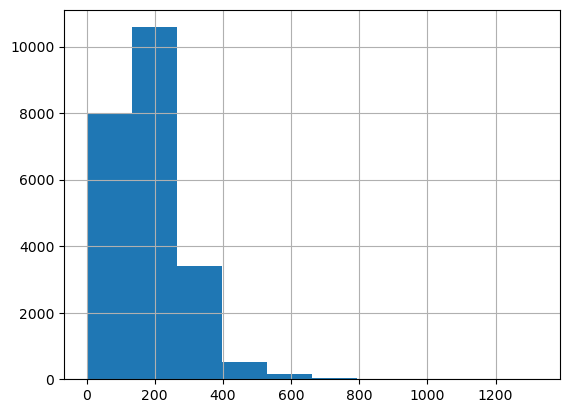

In [13]:
#histogram of 'score' column
df_merge_click_asses['score'].hist()

<Axes: >

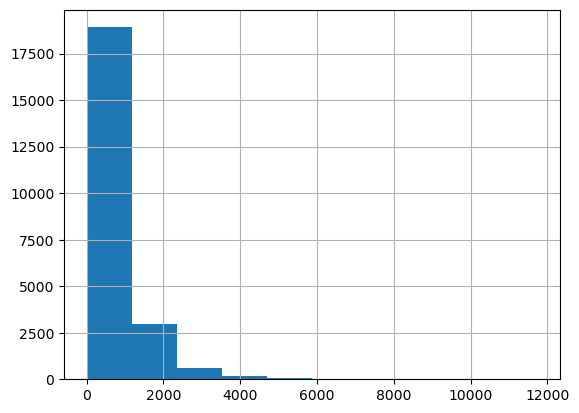

In [14]:
#histogram of 'sum_click' column
df_merge_click_asses['sum_click'].hist()

In [15]:
#Display registration dataframe
df_reg.head()

,index,code_module,code_presentation,id_student,date_registration,date_unregistration
0,0,AAA,2013J,11391,-159.0,NaN
1,1,AAA,2013J,28400,-53.0,NaN
2,2,AAA,2013J,30268,-92.0,12.0
3,3,AAA,2013J,31604,-52.0,NaN
4,4,AAA,2013J,32885,-176.0,NaN


In [16]:
#dataframe info
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                32593 non-null  int64  
 1   code_module          32593 non-null  object 
 2   code_presentation    32593 non-null  object 
 3   id_student           32593 non-null  int64  
 4   date_registration    32548 non-null  float64
 5   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.5+ MB


In [17]:
#number of rows in each column
df_reg.count()

index                  32593
code_module            32593
code_presentation      32593
id_student             32593
date_registration      32548
date_unregistration    10072
dtype: int64

<Axes: >

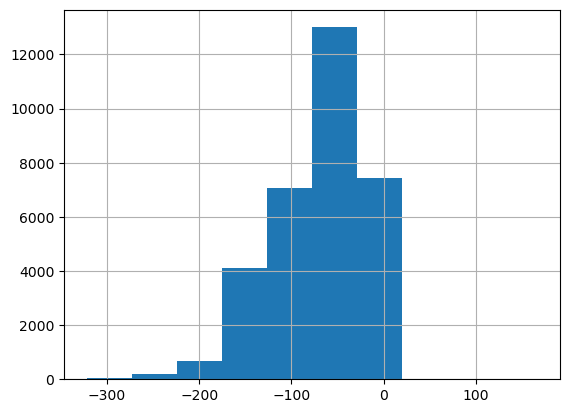

In [18]:
#histrogram of registration date
df_reg['date_registration'].hist()


In [19]:
#describe date_registration column
df_reg['date_registration'].describe()

count    32548.000000
mean       -69.411300
std         49.260522
min       -322.000000
25%       -100.000000
50%        -57.000000
75%        -29.000000
max        167.000000
Name: date_registration, dtype: float64

<Axes: >

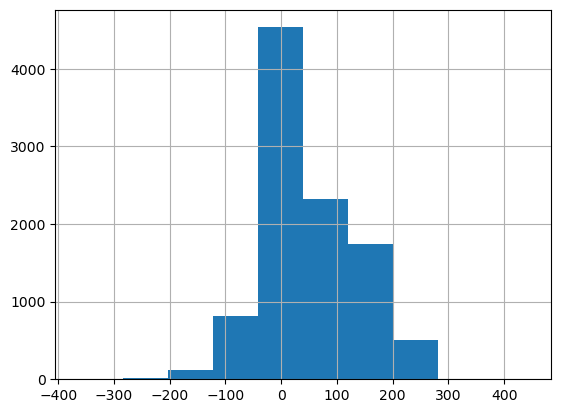

In [20]:
#histogram of date_unregistration
df_reg['date_unregistration'].hist()

In [21]:
#Display dataframe
df.head()

,index,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [22]:
#merge df and df_reg on 'id_student' column
merge_df = pd.merge(df, df_reg, on='id_student')
merge_df.head()

,index_x,code_module_x,code_presentation_x,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,index_y,code_module_y,code_presentation_y,date_registration,date_unregistration
0,0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,0,AAA,2013J,-159.0,NaN
1,1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1,AAA,2013J,-53.0,NaN
2,2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,2,AAA,2013J,-92.0,12.0
3,3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,3,AAA,2013J,-52.0,NaN
4,4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,4,AAA,2013J,-176.0,NaN


In [23]:
#merge df_merge_click_asses and merge_df on 'id_student' column
final_merge = pd.merge(df_merge_click_asses, merge_df, on='id_student')
final_merge.head()

,id_student,score,sum_click,index_x,code_module_x,code_presentation_x,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,index_y,code_module_y,code_presentation_y,date_registration,date_unregistration
0,6516,108.0,1046,383,AAA,2014J,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,383,AAA,2014J,-52.0,NaN
1,8462,522.0,533,14395,DDD,2013J,M,London Region,HE Qualification,30-40%,55<=,0,90,N,Withdrawn,14395,DDD,2013J,-137.0,119.0
2,8462,522.0,533,14395,DDD,2013J,M,London Region,HE Qualification,30-40%,55<=,0,90,N,Withdrawn,17560,DDD,2014J,-38.0,18.0
3,8462,522.0,533,17560,DDD,2014J,M,London Region,HE Qualification,30-40%,55<=,1,60,N,Withdrawn,14395,DDD,2013J,-137.0,119.0
4,8462,522.0,533,17560,DDD,2014J,M,London Region,HE Qualification,30-40%,55<=,1,60,N,Withdrawn,17560,DDD,2014J,-38.0,18.0


In [24]:
#create new dataframe with relevant columns
demo_df = final_merge[['score','sum_click','date_registration','code_module_x', 'region', 'highest_education', 'imd_band', 'age_band', 'gender', 'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result']]
demo_df.head()

,score,sum_click,date_registration,code_module_x,region,highest_education,imd_band,age_band,gender,num_of_prev_attempts,studied_credits,disability,final_result
0,108.0,1046,-52.0,AAA,Scotland,HE Qualification,80-90%,55<=,M,0,60,N,Pass
1,522.0,533,-137.0,DDD,London Region,HE Qualification,30-40%,55<=,M,0,90,N,Withdrawn
2,522.0,533,-38.0,DDD,London Region,HE Qualification,30-40%,55<=,M,0,90,N,Withdrawn
3,522.0,533,-137.0,DDD,London Region,HE Qualification,30-40%,55<=,M,1,60,N,Withdrawn
4,522.0,533,-38.0,DDD,London Region,HE Qualification,30-40%,55<=,M,1,60,N,Withdrawn


In [25]:
#dataframe info
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33375 entries, 0 to 33374
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   score                 33375 non-null  float64
 1   sum_click             33375 non-null  int64  
 2   date_registration     33357 non-null  float64
 3   code_module_x         33375 non-null  object 
 4   region                33375 non-null  object 
 5   highest_education     33375 non-null  object 
 6   imd_band              32095 non-null  object 
 7   age_band              33375 non-null  object 
 8   gender                33375 non-null  object 
 9   num_of_prev_attempts  33375 non-null  int64  
 10  studied_credits       33375 non-null  int64  
 11  disability            33375 non-null  object 
 12  final_result          33375 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 3.6+ MB


In [26]:
#number of rows in each column
demo_df.count()

score                   33375
sum_click               33375
date_registration       33357
code_module_x           33375
region                  33375
highest_education       33375
imd_band                32095
age_band                33375
gender                  33375
num_of_prev_attempts    33375
studied_credits         33375
disability              33375
final_result            33375
dtype: int64

In [27]:
#number of null values in each column
demo_df.isnull().sum()

score                      0
sum_click                  0
date_registration         18
code_module_x              0
region                     0
highest_education          0
imd_band                1280
age_band                   0
gender                     0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [28]:
#unique values in each column
demo_df.nunique()

score                    659
sum_click               2913
date_registration        314
code_module_x              7
region                    13
highest_education          5
imd_band                  10
age_band                   3
gender                     2
num_of_prev_attempts       7
studied_credits           52
disability                 2
final_result               4
dtype: int64

In [29]:
#values in each column
col_list = ['region', 'highest_education', 'imd_band', 'gender', 'num_of_prev_attempts', 'studied_credits', 'age_band', 'disability', 'final_result']
for i in col_list:
    print(demo_df[i].unique())

['Scotland' 'London Region' 'East Anglian Region' 'Wales'
 'East Midlands Region' 'South Region' 'North Western Region'
 'South East Region' 'South West Region' 'Yorkshire Region'
 'West Midlands Region' 'North Region' 'Ireland']
['HE Qualification' 'Lower Than A Level' 'A Level or Equivalent'
 'Post Graduate Qualification' 'No Formal quals']
['80-90%' '30-40%' '90-100%' '20-30%' '50-60%' '40-50%' '60-70%' '10-20'
 '70-80%' '0-10%' None]
['M' 'F']
[0 1 2 4 3 5 6]
[ 60  90 240 120  30 150  70 180 105  50 300 270 160 110  40  80 210 140
 115 220  75 135 165 100 200 310 130 145  45 430 345 420 225 170 235 250
 280 325 215  55 255 195 155 360  95 190  65 330  85 630 355 205]
['55<=' '0-35' '35-55']
['N' 'Y']
['Pass' 'Withdrawn' 'Fail' 'Distinction']


In [30]:
#remove rows with null values
demo_df.dropna()
demo_df.isnull().sum()

score                      0
sum_click                  0
date_registration         18
code_module_x              0
region                     0
highest_education          0
imd_band                1280
age_band                   0
gender                     0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [31]:
#remove rows with null values
demo_df = demo_df.dropna()

In [32]:
#convert final_result to numerical data. 1 = Distinction or Pass, 0 = Fail or Withdrawn
demo_df_n=demo_df.replace(['Pass', 'Withdrawn', 'Fail', 'Distinction'], [1, 0, 0, 1])
demo_df_n.head()

,score,sum_click,date_registration,code_module_x,region,highest_education,imd_band,age_band,gender,num_of_prev_attempts,studied_credits,disability,final_result
0,108.0,1046,-52.0,AAA,Scotland,HE Qualification,80-90%,55<=,M,0,60,N,1
1,522.0,533,-137.0,DDD,London Region,HE Qualification,30-40%,55<=,M,0,90,N,0
2,522.0,533,-38.0,DDD,London Region,HE Qualification,30-40%,55<=,M,0,90,N,0
3,522.0,533,-137.0,DDD,London Region,HE Qualification,30-40%,55<=,M,1,60,N,0
4,522.0,533,-38.0,DDD,London Region,HE Qualification,30-40%,55<=,M,1,60,N,0


In [33]:
#convert 55<= age_band values to 55
demo_df_n['age_band'] = demo_df_n['age_band'].replace('55<=', '55')
demo_df_n['age_band'].unique()

array(['55', '0-35', '35-55'], dtype=object)

In [34]:
#convert age_band to 1,2,3 
demo_df_n['age_band'] = demo_df_n['age_band'].replace(['0-35', '35-55', '55'], [1, 2, 3])
demo_df_n['age_band'].unique()

array([3, 1, 2])

In [35]:
#replace 10-20 in 'imd_band' to 10-20%
demo_df_n['imd_band'] = demo_df_n['imd_band'].replace('10-20', '10-20%')
#check if the change has been made
demo_df_n['imd_band'].unique()

array(['80-90%', '30-40%', '90-100%', '20-30%', '50-60%', '40-50%',
       '60-70%', '10-20%', '70-80%', '0-10%'], dtype=object)

In [36]:
#look at studied_credits value counts for binning
studied_credits_counts = demo_df_n['studied_credits'].value_counts()
studied_credits_counts

60     16485
120     5994
90      3758
30      3163
150      894
180      812
240      220
210      153
75       105
70        88
270       41
135       40
130       39
100       31
45        31
300       31
80        24
40        19
110       14
160       14
195       11
105       11
165        8
140        7
190        7
220        7
170        6
330        6
145        6
50         5
115        5
360        4
85         4
250        4
55         4
225        3
95         3
345        2
310        2
200        2
255        2
235        2
420        1
155        1
215        1
325        1
65         1
280        1
430        1
630        1
355        1
205        1
Name: studied_credits, dtype: int64

In [37]:
#choose cutoff value and create list of studied_credits to be replaced
replace_studied_credits = list(studied_credits_counts[studied_credits_counts < 700].index)

#replace studied_credits values with 'Other'
for x in replace_studied_credits:
    demo_df_n['studied_credits'] = demo_df_n['studied_credits'].replace(x, 'Other')

#check if the change has been made
demo_df_n['studied_credits'].value_counts()

60       16485
120       5994
90        3758
30        3163
Other      971
150        894
180        812
Name: studied_credits, dtype: int64

In [38]:
#check row count of the dataframe
demo_df_n.count()


score                   32077
sum_click               32077
date_registration       32077
code_module_x           32077
region                  32077
highest_education       32077
imd_band                32077
age_band                32077
gender                  32077
num_of_prev_attempts    32077
studied_credits         32077
disability              32077
final_result            32077
dtype: int64

In [39]:
#check final dataframe
demo_df_n.head()

,score,sum_click,date_registration,code_module_x,region,highest_education,imd_band,age_band,gender,num_of_prev_attempts,studied_credits,disability,final_result
0,108.0,1046,-52.0,AAA,Scotland,HE Qualification,80-90%,3,M,0,60,N,1
1,522.0,533,-137.0,DDD,London Region,HE Qualification,30-40%,3,M,0,90,N,0
2,522.0,533,-38.0,DDD,London Region,HE Qualification,30-40%,3,M,0,90,N,0
3,522.0,533,-137.0,DDD,London Region,HE Qualification,30-40%,3,M,1,60,N,0
4,522.0,533,-38.0,DDD,London Region,HE Qualification,30-40%,3,M,1,60,N,0


MODELS

In [40]:
#Import modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf


logistic regression

In [41]:
# Split the data into X (feature) and y (target)
y = demo_df_n['final_result']
X = demo_df_n.drop(columns=['final_result'])

#Encode the categorical data 
X = pd.get_dummies(X)

# Split into testing and training sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Declare a logistic regression model.
# Apply a random_state of 9 to the model
logistic_regression_model = LogisticRegression(random_state=9, max_iter=1000, solver='newton-cg')

# Fit and save the logistic regression model using the training data
lr_model = logistic_regression_model.fit(X_train, y_train)

#Generate training predictions
training_predictions = lr_model.predict(X_train)

#Generate testing predictions
testing_predictions = logistic_regression_model.predict(X_test)

# Create and save the confusion matrix for the training data
training_matrix = confusion_matrix(y_train, training_predictions)

# Print the confusion matrix for the training data
print('training_matrix:')
print(training_matrix)

# Create and save the confusion matrix for the testing data
test_matrix = confusion_matrix(y_test, testing_predictions)

# Print the confusion matrix for the testing data
print('test_matrix:')
print(test_matrix)

# Create and save the training classification report
training_report = classification_report(y_train, training_predictions)

# Print the training classification report
print('training_report:')
print(training_report)

# Create and save the testing classification report
testing_report = classification_report(y_test, testing_predictions)

# Print the testing classification report
print('testing_report:')
print(testing_report)

training_matrix:
[[6932 4282]
 [3372 9471]]
test_matrix:
[[2329 1434]
 [1071 3186]]
training_report:
              precision    recall  f1-score   support

           0       0.67      0.62      0.64     11214
           1       0.69      0.74      0.71     12843

    accuracy                           0.68     24057
   macro avg       0.68      0.68      0.68     24057
weighted avg       0.68      0.68      0.68     24057

testing_report:
              precision    recall  f1-score   support

           0       0.69      0.62      0.65      3763
           1       0.69      0.75      0.72      4257

    accuracy                           0.69      8020
   macro avg       0.69      0.68      0.68      8020
weighted avg       0.69      0.69      0.69      8020



decision tree

In [42]:
# Load data
y = demo_df_n['final_result']
X = demo_df_n.drop(['final_result'], axis=1)

#Encode the categorical data 
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Decision Tree model
tree_model = DecisionTreeClassifier()

# Train the model
tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred = tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Decision Tree model: {accuracy:.2f}')

Accuracy of the Decision Tree model: 0.73


random forest

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,2703,961
Actual 1,731,3625


Accuracy Score : 0.7890274314214464
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.74      0.76      3664
           1       0.79      0.83      0.81      4356

    accuracy                           0.79      8020
   macro avg       0.79      0.78      0.79      8020
weighted avg       0.79      0.79      0.79      8020



<Axes: title={'center': 'Features Importances'}, ylabel='1'>

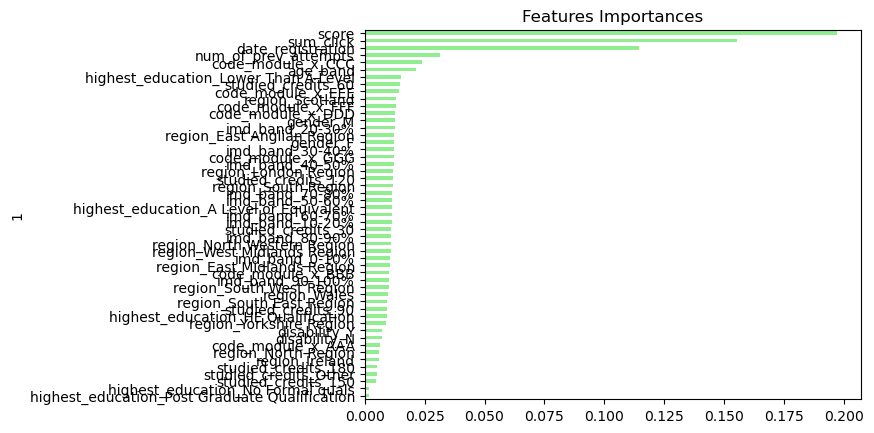

In [43]:
# Define features set
X = demo_df_n.copy()
X.drop("final_result", axis=1, inplace=True)

#Encode the categorical data 
X = pd.get_dummies(X)

 # Define target vector
y = demo_df_n["final_result"].ravel()

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

 # Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

neutral network

In [44]:
# Convert categorical data to numeric with `pd.get_dummies`
category_convert = pd.get_dummies(demo_df_n)

# Split our preprocessed data into our features and target arrays
y = category_convert["final_result"].values
X = category_convert.drop(["final_result"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#Function to create model
def create_model(hp):
    nn = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=X_train_scaled.shape[1]))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn


/var/folders/t4/k2tbzzpn1hsdycb190cq1m5w0000gn/T/ipykernel_54115/3738965723.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = category_convert.drop(["final_result"],1).values


In [45]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))
 # Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

Reloading Tuner from ./untitled_project/tuner0.json


{'activation': 'relu',
 'first_units': 9,
 'num_layers': 4,
 'units_0': 5,
 'units_1': 5,
 'units_2': 3,
 'units_3': 3,
 'units_4': 3,
 'units_5': 9,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [46]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

/Users/patricbeaven/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/patricbeaven/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


251/251 - 0s - 721us/step - accuracy: 0.6935 - loss: 0.5899
Loss: 0.5899174213409424, Accuracy: 0.693516194820404


Decision tree XGBoost

Accuracy: 77.88%


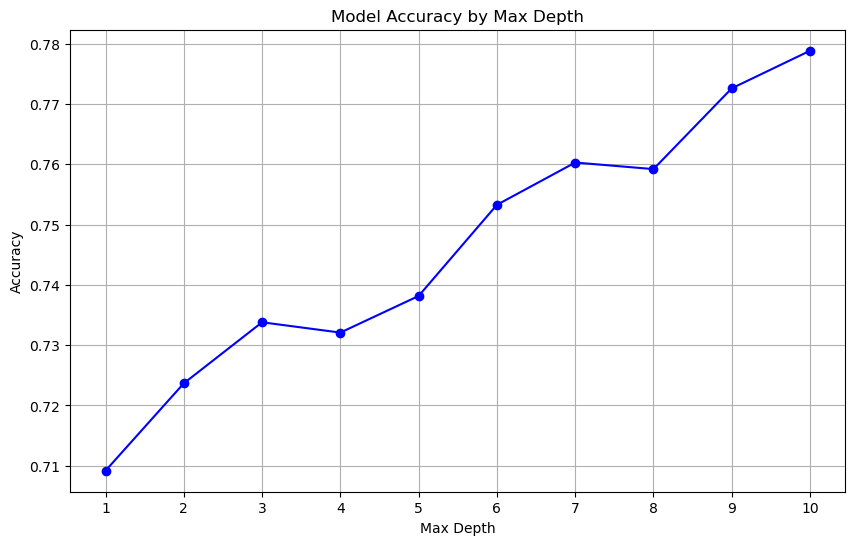

In [47]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Load data
y = demo_df_n['final_result']
X = demo_df_n.drop(['final_result'], axis=1)

#Encode the categorical data 
X = pd.get_dummies(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Varying max_depth for example
depths = range(1, 11)  
accuracies = []

for depth in depths:
    model = xgb.XGBClassifier(max_depth=depth, use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o', linestyle='-', color='b')
plt.title('Model Accuracy by Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(depths)  
plt.show()
